In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('../datasets/liver.csv',encoding='latin1')

In [3]:
data.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [4]:
data['Gender of the patient']

0        Female
1          Male
2          Male
3          Male
4          Male
          ...  
30686      Male
30687      Male
30688      Male
30689    Female
30690      Male
Name: Gender of the patient, Length: 30691, dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30689 non-null  float64
 1   Gender of the patient                 29789 non-null  object 
 2   Total Bilirubin                       30043 non-null  float64
 3   Direct Bilirubin                      30130 non-null  float64
 4    Alkphos Alkaline Phosphotase         29895 non-null  float64
 5    Sgpt Alamine Aminotransferase        30153 non-null  float64
 6   Sgot Aspartate Aminotransferase       30229 non-null  float64
 7   Total Protiens                        30228 non-null  float64
 8    ALB Albumin                          30197 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  30132 non-null  float64
 10  Result                                30691 non-null  int64  
dtypes: float64(9), 

In [6]:
data.describe()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
count,30689.000000,30043.000000,30130.000000,29895.000000,30153.000000,30229.000000,30228.000000,30197.000000,30132.000000,30691.000000
mean,44.107205,3.370319,1.528042,289.075364,81.488641,111.469979,6.480237,3.130142,0.943467,1.285882
std,15.981043,6.255522,2.869592,238.537589,182.158850,280.851078,1.081980,0.792281,0.323164,0.451841
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,32.000000,0.800000,0.200000,175.000000,23.000000,26.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,209.000000,35.000000,42.000000,6.600000,3.100000,0.900000,1.000000
75%,55.000000,2.700000,1.300000,298.000000,62.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [7]:
data.isnull().sum()

Age of the patient                        2
Gender of the patient                   902
Total Bilirubin                         648
Direct Bilirubin                        561
 Alkphos Alkaline Phosphotase           796
 Sgpt Alamine Aminotransferase          538
Sgot Aspartate Aminotransferase         462
Total Protiens                          463
 ALB Albumin                            494
A/G Ratio Albumin and Globulin Ratio    559
Result                                    0
dtype: int64

In [8]:
from sklearn.impute import SimpleImputer

# Impute missing values
imputed_data = SimpleImputer(strategy='most_frequent').fit_transform(data)

# Create DataFrame with imputed data and original column names
data = pd.DataFrame(imputed_data, columns=data.columns)


C:\Users\narah\anaconda3\lib\site-packages\scipy\__init__.py:177: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
data['Age'] = data['Age of the patient']
data['Gender'] = data['Gender of the patient']
data = data.drop(columns=['Age of the patient','Gender of the patient'])

In [10]:
data.columns

Index(['Total Bilirubin', 'Direct Bilirubin', ' Alkphos Alkaline Phosphotase',
       ' Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', ' ALB Albumin',
       'A/G Ratio Albumin and Globulin Ratio', 'Result', 'Age', 'Gender'],
      dtype='object')

In [11]:
from sklearn.preprocessing import LabelEncoder
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])

In [12]:
data.isnull().sum()

Total Bilirubin                         0
Direct Bilirubin                        0
 Alkphos Alkaline Phosphotase           0
 Sgpt Alamine Aminotransferase          0
Sgot Aspartate Aminotransferase         0
Total Protiens                          0
 ALB Albumin                            0
A/G Ratio Albumin and Globulin Ratio    0
Result                                  0
Age                                     0
Gender                                  0
dtype: int64

In [13]:
data.head()

,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result,Age,Gender
0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.9,1,65.0,0
1,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1,62.0,1
2,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1,62.0,1
3,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.0,1,58.0,1
4,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.4,1,72.0,1


C:\Users\narah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Result', ylabel='count'>

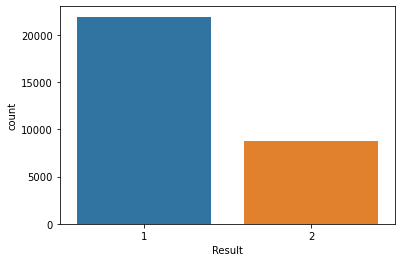

In [14]:
import seaborn as sns
sns.countplot('Result', data = data)

Here 2 means suffering with disease and 1 means not suffering with disease.

Replacing 2 with 1 and 1 with 0, for better understanding.

In [14]:
data['Result'] = data['Result'].replace([2,1],[1,0])
data['Result'].head()

0    0
1    0
2    0
3    0
4    0
Name: Result, dtype: int64

C:\Users\narah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Result', ylabel='count'>

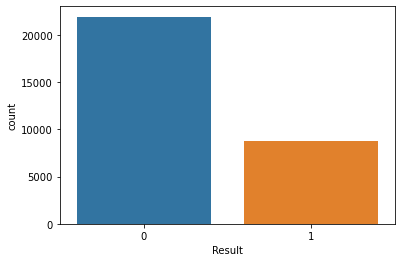

In [15]:
import seaborn as sns
sns.countplot('Result', data = data)

In [16]:
data.columns

Index(['Total Bilirubin', 'Direct Bilirubin', ' Alkphos Alkaline Phosphotase',
       ' Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', ' ALB Albumin',
       'A/G Ratio Albumin and Globulin Ratio', 'Result', 'Age', 'Gender'],
      dtype='object')

C:\Users\narah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

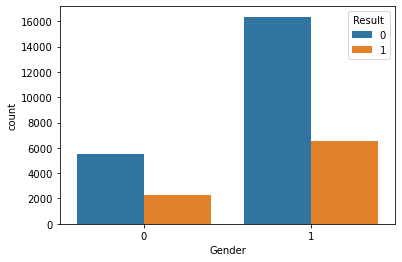

In [17]:
sns.countplot('Gender', data = data, hue = 'Result')

In [18]:
data = pd.get_dummies(data, columns = ['Gender'], drop_first = True)

In [19]:
data.head()

,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result,Age,Gender_1
0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.9,0,65.0,0
1,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,0,62.0,1
2,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,0,62.0,1
3,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.0,0,58.0,1
4,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.4,0,72.0,1


<AxesSubplot:>

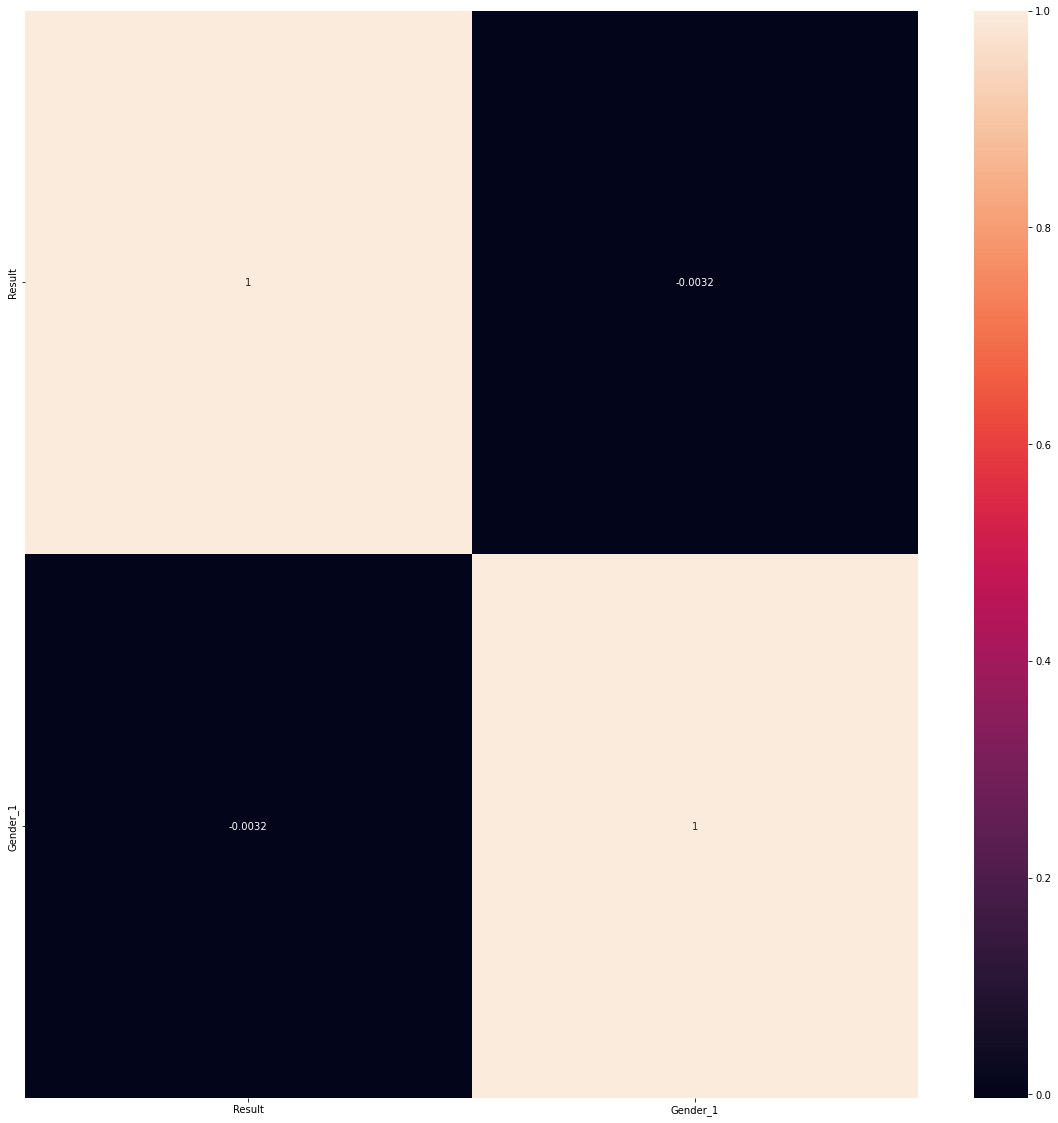

In [20]:
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(), annot = True)

In [21]:
data.corr()

,Result,Gender_1
Result,1.00000,-0.00319
Gender_1,-0.00319,1.00000


In [22]:
# X = data[['Albumin_and_Globulin_Ratio', 'Albumin', 'Total_Protiens', 'Aspartate_Aminotransferase', 'Alamine_Aminotransferase', 'Alkaline_Phosphotase', 'Age']]
X = data.drop('Result', axis = 1)
y = data['Result']

In [23]:
X.columns

Index(['Total Bilirubin', 'Direct Bilirubin', ' Alkphos Alkaline Phosphotase',
       ' Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', ' ALB Albumin',
       'A/G Ratio Albumin and Globulin Ratio', 'Age', 'Gender_1'],
      dtype='object')

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [26]:
print("Train Set: ", X_train.shape, y_train.shape)
print("Test Set: ", X_test.shape, y_test.shape)

Train Set:  (27621, 10) (27621,)
Test Set:  (3070, 10) (3070,)


In [27]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [29]:
confusion_matrix(y_test, model.predict(X_test))

array([[2198,    1],
       [  12,  859]], dtype=int64)

In [30]:
print(f"Accuracy is {round(accuracy_score(y_test, model.predict(X_test))*100,2)}")

Accuracy is 99.58


In [33]:
import pickle
pickle.dump(model, open('./models/liver.pkl', 'wb'))